# Project: Customizing Visualization Of College Majors Data In The USA

We will first explored how to create and customize a range of compelling data plots using the high-level functions that Matplotlib and Pandas provide. Since these high-level functions all use Matplotlib underneath, we will then dove into the internals of the Matplotlib library. In this project, we'll practice recreating some of the plots using Matplotlib that Seaborn and Pandas allow us to generate using high-level functions. This deliberate practice will help prepare us for creating new kinds of plots in the future that these libraries don't provide.

## Introduction to the Data

In [22]:
# Import the needed packages 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [23]:
# Upload the data into a DataFrame and take a look at the first rows.
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [24]:
# Let's see how the end of the dataset looks like
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


We work with the dataset from the American Community Survey on job outcomes for recent college graduates. You can read about how the dataset was compiled on FiveThirtyEight's Github repo.

Here are some of the columns in the dataset:

- Rank - Rank by median earnings
- Major_code - Major code
- Major - Major description
- Major_category - Category of major
- Total - Total number of people with major
- Sample_size - Sample size (unweighted) of full-time
- Men - Male graduates
- Women - Female graduates
- ShareWomen - Women as share of total
- Employed - Number employed

In [25]:
# We want to see general information
recent_grads.describe()

/home/francois/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,NaN,NaN,NaN,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,NaN,NaN,NaN,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,NaN,NaN,NaN,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [26]:
print(recent_grads.shape[0])
print(recent_grads.dropna().shape[0])
# Drop missing values from the dataset
recent_grads = recent_grads.dropna()

173
172


## Scatter Matrix

Both Pandas and Seaborn have high-level functions to create a scatter matrix, a kind of plot that makes it easy to explore relationships between combinations of columns. The Pandas implementation can be called using the scatter_matrix() method. Now that we have some familiarity with Matplotlib's internals, we'll be able to recreate the below scatter matrix using Matplotlib.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f4bf0ed68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8f4bdf7b70>]], dtype=object)

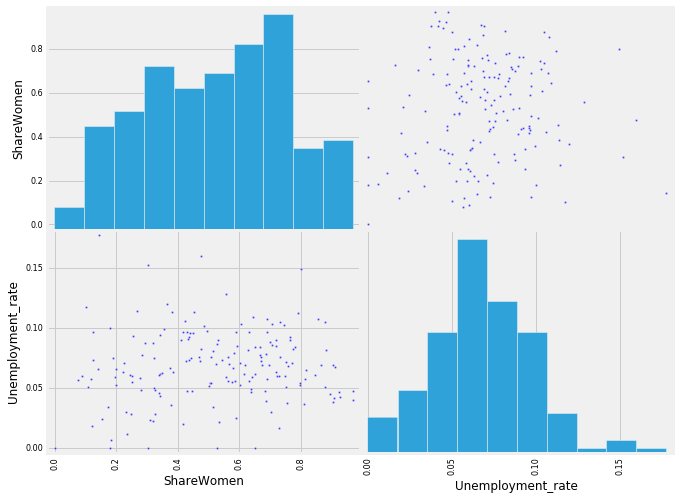

In [27]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]], figsize=(10,8), alpha = 0.75)

Now that we have 4 Axes instances, corresponding to the 4 subplots in the scatter matrix, we can generate the graphs that belong on each subplot.

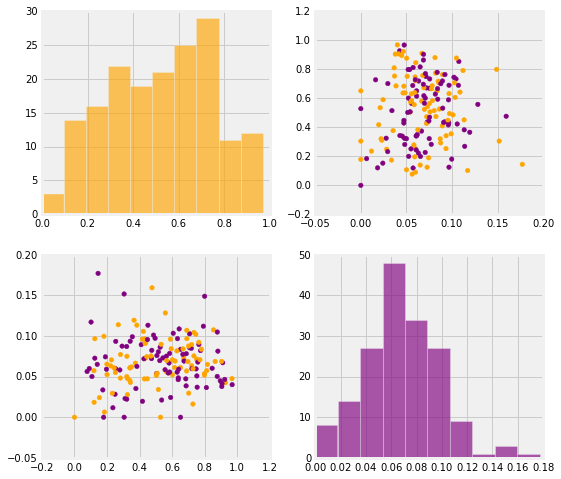

In [28]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
fig_rg = plt.figure(figsize=(8,8))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"], color = 'orange', alpha = 0.65)

# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"], color = ['purple','orange'])

# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"], color = ['orange', 'purple'])

# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"], color = 'purple' ,alpha = 0.65)

plt.show()

## Scatter matrix, step 2

Now let's tweak the appearance of the subplots to resemble the initial scatter matrix.

To tweak how the axis ticks look, we need to grab a subplot's XAxis or YAxis instance and call specific methods. Use the Axes methods get_xaxis() and get_yaxis() to return a subplot's XAxis instance and YAxis instance. We can then either assign the instances to variables and call methods on the variables or skip the assignment and chain the method directly. ax1_rg.get_yaxis().tick_left() causes the y-axis ticks to be displayed on the left side for that subplot.

To adjust the space between subplots, we can use the method subplots_adjust() and set the wspace and hspace parameters.

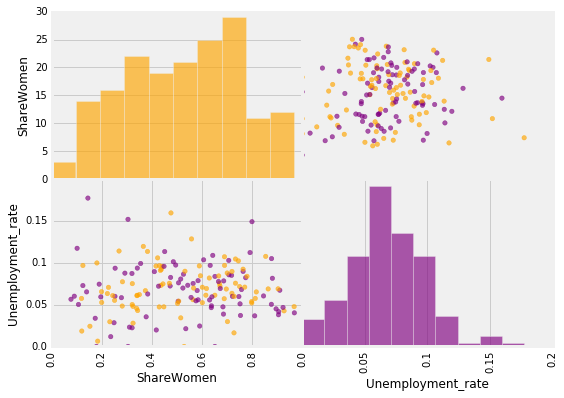

In [29]:
# First, we need to create a Figure instance and create 4 axes, corresponding to each subplot.
# We want to clean a little bit the presentation of our plots.
fig_rg = plt.figure(figsize=(8,6))
ax1_rg = fig_rg.add_subplot(2,2,1)
ax2_rg = fig_rg.add_subplot(2,2,2)
ax3_rg = fig_rg.add_subplot(2,2,3)
ax4_rg = fig_rg.add_subplot(2,2,4)

# Top left plot
ax1_rg.hist(recent_grads["ShareWomen"], color = 'orange', alpha = 0.65)
# Top right plot
ax2_rg.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"], color = ['purple','orange'], alpha =0.65)
# Bottom left plot
ax3_rg.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"], color = ['orange','purple'], alpha =0.65)
# Bottom right plot
ax4_rg.hist(recent_grads["Unemployment_rate"], color = 'purple', alpha = 0.65)

# Top left plot
ax1_rg.set_ylabel("ShareWomen")
ax1_rg.get_xaxis().tick_top()
ax1_rg.get_xaxis().set_visible(False)
ax1_rg.get_yaxis().tick_left()
ax1_rg.set_ylim(0,30)
ax1_rg.set_yticklabels([0, 5, 10, 15, 20, 25, 30])

# Top right plot
ax2_rg.get_yaxis().set_visible(False)
ax2_rg.get_xaxis().set_visible(False)
ax2_rg.set_xlim(0.0, 0.20)

# Bottom left plot
ax3_rg.set_xlabel("ShareWomen")
ax3_rg.set_ylabel("Unemployment_rate")
ax3_rg.get_xaxis().tick_bottom()
ax3_rg.get_yaxis().tick_left()
ax3_rg.set_ylim(0.00, 0.20)
ax3_rg.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3_rg.set_xlim(0.0, 1.0)
ax3_rg.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)

# Bottom right plot
ax4_rg.set_xlabel("Unemployment_rate")
ax4_rg.get_yaxis().set_visible(False)
ax4_rg.get_xaxis().tick_bottom()
ax4_rg.set_xlim(0.0, 0.20)
ax4_rg.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Remove space between sub plots.
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Grouped Bar Plots

Since the dataset on recent college graduates contains information on the number of males and females included in the study, we can create a grouped bar plot to compare the gender ratios across majors. A grouped bar plot is a type of data visualization that enable us to easily compare groups of related bars together. A grouped bar plot would allow us to visually understand the gender imbalance for each major since the bars representing the proportion of men and the proportion of women for each major would be grouped together.

Pandas allows us to easily create a grouped bar plot on by using the plot() method. We need to first filter the DataFrame down to the columns we want visualized as bars and set the type parameter to "bar" when calling the plot() method.

The blue bars represent the proportion of male students while the red bars represent the proportion of female students. This plot allows you to easily see the gender balance for each of the majors in the Arts category. In this step, we'll prepare the DataFrame and generate the bars for just the male proportions and avoid any thorough styling for now.

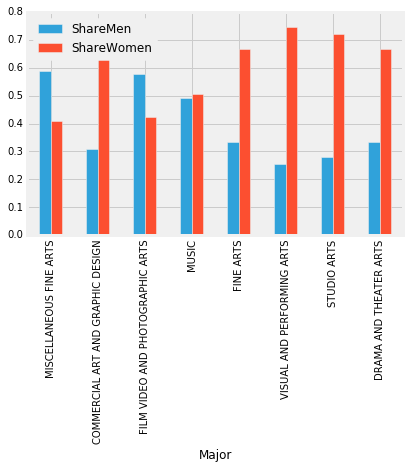

In [30]:
# Pandas generated grouped bar plot
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")

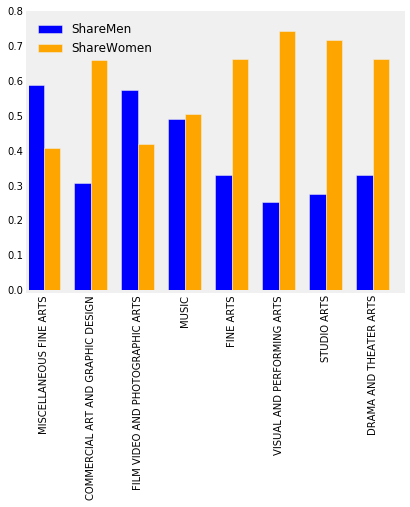

In [31]:
import numpy as np
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

fig_rg2 = plt.figure(figsize=(6,5))
ax1_rg2 = fig_rg2.add_subplot(1,1,1)

arts = recent_grads[recent_grads["Major_category"] == "Arts"]
major_names = arts["Major"].tolist()
locs = np.arange(len(major_names))
width = 0.35

# List representation of these columns
men_proportions = arts["ShareMen"].tolist()
women_proportions = arts["ShareWomen"].tolist()

# Generate both the bars
bar_1 = ax1_rg2.bar(locs, men_proportions, width)
ax1_rg2.set_xticklabels(major_names, rotation=90)

# Each value offset by `0.35`
offset_locs = locs + width

# Set of bars for `ShareWomen`
bar_2 = ax1_rg2.bar(offset_locs, women_proportions, width, color="orange")

# Align x labels with bars better
ax1_rg2.set_xticks(offset_locs)

# Create a legend
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")

# Display the background grid
plt.grid()
plt.show()

## Conclusion

We've explored how to recreate the scatter matrix and grouped bar plot using only what we know about Matplotlib. In most cases, the high-level methods that Pandas provide allow us to generate the plots we need. When we need to create our own custom data visualization, however, our knowledge of Matplotlib will allow us to create new ones easily.

## Potential Extra Exploration

- Visualize the gender ratios for each major by creating a stacked box plot instead of a grouped bar plot.
    - Pandas stacked box plot
- Practice generating histograms from scratch without relying on the Matplotlib method hist().
    - Pandas histogram
    - Seaborn histogram
- Practice generating box plots using Matplotlib only.
    - Pandas box plot
    - Seaborn box plot
- Structure your Matplotlib code as a function so you can reuse the code.
    - Write a function that takes in a DataFrame, takes in a list of column names, and generates a scatter matrix for combinations of columns.
        - While the scatter matrix you generated in this guided project used 2 columns, how can you generalize the code to handle n columns.
        - As n gets larger, how do you dynamically specify the figsize parameter when creating the Plot instance so the data visualization is legible with more subplots.